In [572]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Question 1**

*1)*

In [573]:
# 1) Read the CSV (I had to use encoding="latin-1" because the file is encoded in ISO-8859-1)
df = pd.read_csv("airbnb_NYC.csv", encoding="latin-1")
df.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [574]:
# 2) Quick look at the raw Price values
df["Price"].head(10)

0    145
1     37
2     28
3    199
4    549
5    149
6    250
7     90
8    270
9    290
Name: Price, dtype: str

In [575]:
# 3) Work on a string copy of Price so I can clean it. I also checked for missing values.
df_price = df["Price"].astype(str)
df_price.isna().sum()

np.int64(0)

In [576]:
# 4) Remove formatting issues: commas, $, extra spaces
price_str = price_str.str.replace(",", "", regex=False) 
price_str = price_str.str.replace("$", "", regex=False)
price_str = price_str.str.strip()

In [577]:
# 5) Convert to numeric; invalid values become NaN
df["Price_clean"] = pd.to_numeric(price_str, errors="coerce")


In [578]:
# 6) Missing values after cleaning
missing_after = df["Price_clean"].isna().sum()
missing_after

np.int64(0)

In [579]:
#Check if comma is removed, especially for prices > 999
mask = df["Price"].astype(str).str.contains(",", na=False)
df.loc[mask, ["Price", "Price_clean"]].head(10)

,Price,Price_clean
101,"1,990",1990
263,"1,000",1000
764,"1,200",1200
1272,"1,000",1000
1275,"5,000",5000
1476,"3,000",3000
1846,"1,500",1500
1973,"1,200",1200
1977,"1,800",1800
2095,"1,300",1300


I ended up with 0 missing values and cleaned the variable price

*2)*

In [580]:
df = pd.read_csv("mn_police_use_of_force.csv")
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [581]:
inj_str = df["subject_injury"].astype(str)
inj_str = inj_str.str.strip()
inj_str = inj_str.str.lower()

In [582]:
inj_str.head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9     no
Name: subject_injury, dtype: str

In [583]:
inj_str = inj_str.replace("nan", np.nan)

In [584]:
df["subject_injury_clean"] = None
df.loc[inj_str == "yes", "subject_injury_clean"] = "Yes"
df.loc[inj_str == "no",  "subject_injury_clean"] = "No"

In [585]:
#Proportion of missing values
prop_missing = df["subject_injury_clean"].isna().mean()
prop_missing

np.float64(0.7619342359767892)

In [586]:
pd.crosstab(df["force_type"], df["subject_injury_clean"], dropna=False)

subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


In [587]:
missing_mask = df["subject_injury_clean"].isna()
# counts of missing vs not missing by force_type
pd.crosstab(df["force_type"], missing_mask, dropna=False)

subject_injury_clean,False,True
force_type,,
Baton,2,2
Bodily Force,2379,7051
Chemical Irritant,172,1421
Firearm,2,0
Gun Point Display,77,27
Improvised Weapon,74,74
Less Lethal,0,87
Less Lethal Projectile,3,0
Maximal Restraint Technique,0,170


In [588]:
# false means data is not missing
pd.crosstab(df["force_type"], missing_mask, normalize="index").sort_values(True, ascending=False)

subject_injury_clean,False,True
force_type,,
Less Lethal,0.000000,1.000000
Maximal Restraint Technique,0.000000,1.000000
Chemical Irritant,0.107972,0.892028
Taser,0.246366,0.753634
Bodily Force,0.252280,0.747720
Baton,0.500000,0.500000
Improvised Weapon,0.500000,0.500000
Police K9 Bite,0.597403,0.402597
Gun Point Display,0.740385,0.259615


In [589]:
df["subject_injury_clean"] = df["subject_injury_clean"].fillna("Missing")
df["subject_injury_clean"]

0        Missing
1        Missing
2        Missing
3        Missing
4        Missing
          ...   
12920    Missing
12921    Missing
12922    Missing
12923    Missing
12924    Missing
Name: subject_injury_clean, Length: 12925, dtype: object

I cleaned subject_injury so it only has Yes, No, or missing (standardized the text and kept NaNs as missing). When I cross-tabbed it with force_type, the missing values clearly depend on force type: Less Lethal and Maximal Restraint Technique are 100% missing, and Chemical Irritant/Taser/Bodily Force are missing most of the time, while Firearm and Less Lethal Projectile have basically no missing values. After that, I replaced the remaining NaNs with the label “Missing.”

3)

In [590]:
df = pd.read_csv("metabric.csv",)
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [591]:
status_str = df["Overall Survival Status"].astype(str)
status_str

0         0:LIVING
1       1:DECEASED
2         0:LIVING
3       1:DECEASED
4       1:DECEASED
           ...    
1338      0:LIVING
1339    1:DECEASED
1340      0:LIVING
1341    1:DECEASED
1342      0:LIVING
Name: Overall Survival Status, Length: 1343, dtype: str

In [592]:
status_str.isna().sum()

np.int64(0)

In [593]:
status_str.value_counts().head(10)


Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64

In [594]:
status_str = status_str.str.strip().str.lower()
df["os_status_dummy"] = None
df.loc[status_str == "0:living",   "os_status_dummy"] = 1
df.loc[status_str == "1:deceased", "os_status_dummy"] = 0

df["os_status_dummy"].value_counts()

os_status_dummy
0    768
1    575
Name: count, dtype: int64

In [595]:
df[["Overall Survival Status", "os_status_dummy"]]

,Overall Survival Status,os_status_dummy
0,0:LIVING,1
1,1:DECEASED,0
2,0:LIVING,1
3,1:DECEASED,0
4,1:DECEASED,0
...,...,...
1338,0:LIVING,1
1339,1:DECEASED,0
1340,0:LIVING,1
1341,1:DECEASED,0


4)

In [596]:
df = pd.read_csv("airbnb_NYC.csv", encoding="latin-1")
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [597]:
rating = df["Review Scores Rating"]
rating 

0         NaN
1         NaN
2         NaN
3         NaN
4        96.0
         ... 
30473     NaN
30474     NaN
30475     NaN
30476     NaN
30477     NaN
Name: Review Scores Rating, Length: 30478, dtype: float64

In [598]:
rating_str = rating.astype(str)
rating_str = rating_str.str.strip()
rating_str = rating_str.replace("nan", np.nan)
df["review_rating_num"] = pd.to_numeric(rating_str, errors="coerce")

In [599]:
# how many missing?
missing_count = df["review_rating_num"].isna().sum()
missing_count

np.int64(8323)

In [600]:
median_rating = df["Review Scores Rating"].median()
median_rating

np.float64(94.0)

In [601]:
df["review_rating_new"] = df["Review Scores Rating"].fillna(median_rating)
df["review_rating_new"]

0        94.0
1        94.0
2        94.0
3        94.0
4        96.0
         ... 
30473    94.0
30474    94.0
30475    94.0
30476    94.0
30477    94.0
Name: review_rating_new, Length: 30478, dtype: float64

There are 8323 missing values in Review Scores Rating. I created review_rating_new by filling the missing ratings with the median of the non-missing ratings (94.0). This can bias results because it forces a bunch of listings to have the exact same rating, which shrinks the spread/variation and can make relationships look weaker or cleaner than they really are. Also, the ratings probably aren’t missing randomly (lots of missing ratings might just mean no reviews yet), so filling those with 94 makes those listings look “average-rated” even though they might be systematically different.

**Question 2**

1)

In [602]:
#install xlrd
!pip install xlrd
df = pd.read_excel("GSAF5.xls") 
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
7070,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
7071,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
7072,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


2. 

In [603]:
df.isna().sum()

Date                 0
Year                 2
Type                18
Country             50
State              487
Location           567
Activity           583
Name               218
Sex                578
Age               2994
Injury              35
Fatal Y/N          561
Time              3527
Species           3131
Source              20
pdf                275
href formula       280
href               278
Case Number        276
Case Number.1      277
original order     275
Unnamed: 21       7073
Unnamed: 22       7072
dtype: int64

In [604]:
df = df.drop(columns=["Unnamed: 21", "Unnamed: 22"])
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
7070,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
7071,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
7072,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


3.

An observation is one incident (one row). Dropping mostly-empty columns removes low-information variables but doesn’t remove incidents, so it doesn’t change the observation unit, whereas dropping rows would.

4.

In [605]:
year_str = df["Year"].astype(str)
year_str = year_str.str.strip()
year_str = year_str.replace("nan", np.nan)

In [606]:
#Range is from 0 to 2026
df["year_clean"] = pd.to_numeric(year_str, errors="coerce")
df["year_clean"].min(), df["year_clean"].max()

(np.float64(0.0), np.float64(2026.0))

In [607]:
#Focus on >1940
df_1940 = df[df["year_clean"] >= 1940]
year_counts = df_1940["year_clean"].value_counts().sort_index()
year_counts.head(), year_counts.tail()

(year_clean
 1940.0    24
 1941.0    27
 1942.0    41
 1943.0    28
 1944.0    31
 Name: count, dtype: int64,
 year_clean
 2022.0     98
 2023.0    109
 2024.0     52
 2025.0     66
 2026.0     12
 Name: count, dtype: int64)

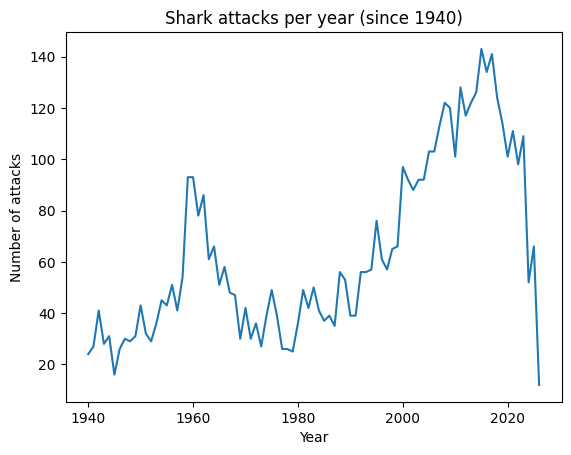

In [608]:
year_counts.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.title("Shark attacks per year (since 1940)")
plt.show()

Increasing long-term, with spikes/dips; recent drop likely due to incomplete recent-year reporting

5.

In [611]:
age_str = df["Age"].astype(str)
age_str = age_str.str.strip()
age_str = age_str.replace("nan", np.nan)
age_str = age_str.replace("?", np.nan)


df["age_clean"] = pd.to_numeric(age_str, errors="coerce")


df["age_clean"].describe()


count    3925.000000
mean       28.171975
std        14.676367
min         1.000000
25%        17.000000
50%        24.000000
75%        37.000000
max        87.000000
Name: age_clean, dtype: float64

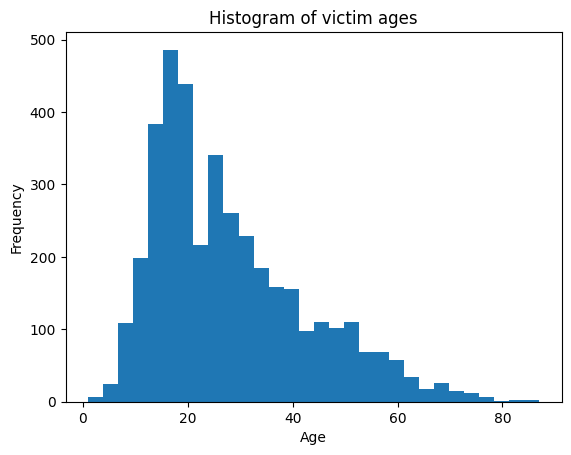

In [613]:
df["age_clean"].dropna().plot(kind="hist", bins=30)
plt.xlabel("Age")
plt.title("Histogram of victim ages")
plt.show()

6.

In [618]:
#take 3 values
type_str = df["Type"].astype(str)
type_str = type_str.str.strip().str.lower()
type_str = type_str.replace("nan", np.nan)

df["type_clean"] = "Unknown"
df.loc[type_str == "provoked", "type_clean"] = "Provoked"
df.loc[type_str == "unprovoked", "type_clean"] = "Unprovoked"


In [619]:
type_counts = df["type_clean"].value_counts(dropna=False)
type_counts

type_clean
Unprovoked    5226
Unknown       1204
Provoked       644
Name: count, dtype: int64

In [620]:
#Proportion unprovoked
prop_unprovoked = (df["type_clean"] == "Unprovoked").mean()
prop_unprovoked

np.float64(0.7387616624257846)

7.

In [621]:
fatal_str = df["Fatal Y/N"].astype(str)
fatal_str = fatal_str.str.strip().str.upper()
fatal_str = fatal_str.replace("NAN", np.nan)

df["fatal_clean"] = "Unknown"
df.loc[fatal_str == "Y", "fatal_clean"] = "Y"
df.loc[fatal_str == "N", "fatal_clean"] = "N"

df["fatal_clean"].value_counts()


fatal_clean
N          4942
Y          1489
Unknown     643
Name: count, dtype: int64

8.

In [624]:
sub = df[
    df["type_clean"].isin(["Provoked", "Unprovoked"]) &
    df["fatal_clean"].isin(["Y", "N"])
].copy()

# fatal rate by type
fatal_rate = (sub["fatal_clean"] == "Y").groupby(sub["type_clean"]).mean()
fatal_rate


type_clean
Provoked      0.033071
Unprovoked    0.246357
Name: fatal_clean, dtype: float64

I filtered the data to only include attacks where type_clean is Provoked or Unprovoked and where fatal_clean is actually known (Y or N) so the comparison is fair with no "unknowns". Then I calculated the fatality rate within each type by turning fatal_clean into a True/False (True if it’s "Y") and taking the mean within each group. Since True counts as 1 and False counts as 0, the mean is basically the proportion fatal for provoked vs unprovoked.
Based on the data, unprovoked attacks are more likely to be fatal than provoked ones

**Question 3**

1)
This paper is about ways and tools that can be used to make the cleaning data process as easy efficient and quickly as possible compared to traditional ways, especially if we are dealing with a huge dataset.

2)
The tidy data standard is basically meant to give a consistent “default” way to organize a dataset so you don’t have to reinvent the structure every time you start cleaning. If the data are arranged in a standard format, it makes initial cleaning + exploration easier, and it also makes different analysis tools work together better so you spend less time reformatting/“translating” the data between tools and more time actually analyzing what’s going on.

3. 
"Like families, tidy datasets are all alike but every messy dataset is messy in its own way." Tidy data sets follow a pretty standard structure while messy data sets follow their own messy structure and can be messy for a lot of different reasons, such as having missing values and having multiple variables comined into one column. “For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.” Everything in a datset depends on the context and what you're trying to measure, and that is different for every dataset.

4) 
A dataset is a collection of values, where every value belongs to a variable and an observation. A variable is all values that measure the same underlying attribute, like height, temperature and duration of (something). An observation would be the "something" here, the unit on which all variables are measured recorded and assembled.

5. 
Tidy data is defined as a standard way to organize a dataset so its meaning matches its layout. Each variable is a column, each observation is a row, and each type of observation gets its own table

6. 